In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.rename(columns={"medv":"price"},inplace=True)

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [7]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [8]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg=LinearRegression()


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scale=StandardScaler()

In [15]:
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

<ipython-input-16-57d26145d8d4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train)


<Axes: ylabel='Density'>

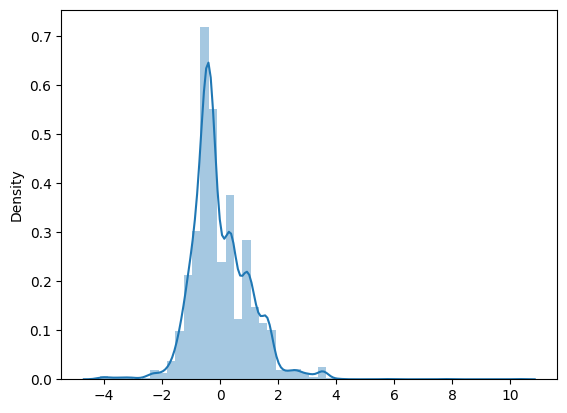

In [16]:
sns.distplot(X_train)

<ipython-input-17-2c8adc7cba18>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_test)


<Axes: ylabel='Density'>

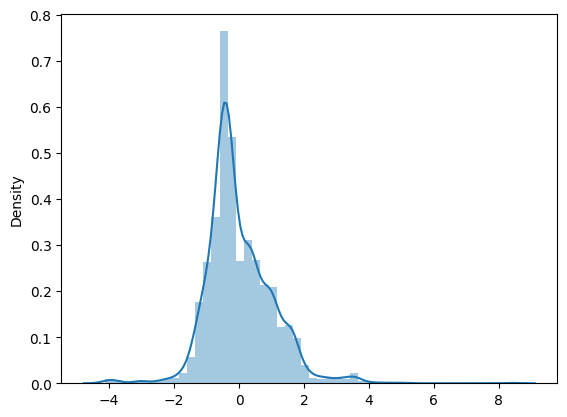

In [17]:
sns.distplot(X_test)

In [18]:
reg.fit(X_train,y_train)

LinearRegression()

In [19]:
from sklearn.model_selection import cross_val_score

In [22]:
cross=cross_val_score(reg,X_train,y_train,scoring="neg_mean_squared_error",cv=5)

In [23]:
np.mean(cross)

-25.977777430926302

In [25]:
y_pred=reg.predict(X_test)

<ipython-input-31-bcca7a5bbed4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y_test,kde=True)


<Axes: xlabel='price', ylabel='Density'>

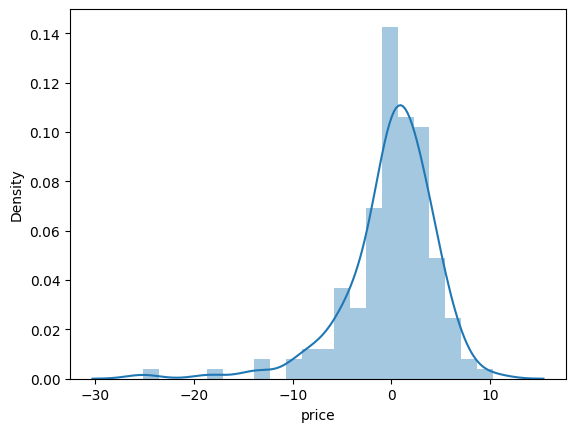

In [31]:
sns.distplot(y_pred-y_test,kde=True)

In [32]:
from sklearn.metrics import r2_score

In [33]:
score=r2_score(y_pred,y_test)

In [34]:
score

0.6693702691495593

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [38]:
rid=Ridge()

In [39]:
parameters={"alpha":[1,2,4,5,6,10,20,40,50,60],}

In [40]:
ridgcv=GridSearchCV(rid,param_grid=parameters,scoring="neg_mean_squared_error",cv=5)

In [43]:
ridgcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 4, 5, 6, 10, 20, 40, 50, 60]},
             scoring='neg_mean_squared_error')

In [44]:
ridgcv.best_params_

{'alpha': 10}

In [45]:
ridgcv.best_score_

-25.80722882229147

In [47]:
ridge_pred=ridgcv.predict(X_test)

<ipython-input-48-64634a38ea40>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ridge_pred-y_test,kde=True)


<Axes: xlabel='price', ylabel='Density'>

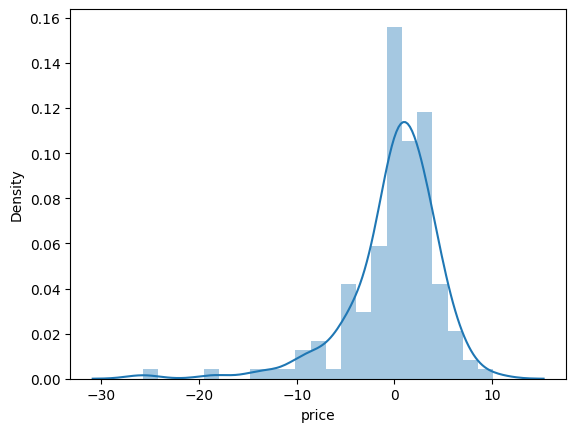

In [48]:
sns.distplot(ridge_pred-y_test,kde=True)

In [50]:
from sklearn.metrics import r2_score
ridgscore=r2_score(y_pred,y_test)

In [51]:
ridgscore

0.6693702691495593